# Data Science Project - Sales Prediction

- Our challenge is to forecast sales based on the investment in advertising on 3 great channels the company invests: TV, newspaper and radio.

- Dataset: https://drive.google.com/drive/folders/1o2lpxoi9heyQV1hIlsHXWSfDkBPtze-V?usp=sharing

### Data Science Project Step by Step

1. Understand the challenge
2. Understand the field/company
3. Extract/obtain data
4. Data processing
5. Exploratory analysis
6. Modeling + Algorithms (Artificial Intelligence, if needed)
7. Understand the results

### 1. Importing the libraries

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression 
from sklearn import metrics

### 2. Importing the dataset

- The columns TV, Radio and Newspaper are in thousands of reais
- The column Sales is in millions of reais

In [9]:
df = pd.read_csv('advertising.csv')
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Radio   200 non-null    float64
 2   Jornal  200 non-null    float64
 3   Vendas  200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


### 3. Exploratory Analysis

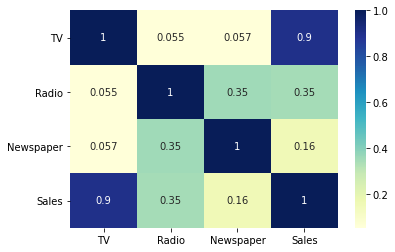

It seems like Sales and TV have a strong correlation, Sales and Radio have mild correlation and Sales and Newspaper have relatively weak correlation.


In [45]:
sns.heatmap(df.corr(), annot=True, cmap='YlGnBu')
plt.show()
print('It seems like Sales and TV have a strong correlation, Sales and Radio have mild \
correlation and Sales and Newspaper have relatively weak correlation.')

### 4. Selecting the training and testing data

In [24]:
x = df[['TV', 'Radio', 'Newspaper']]
y = df['Sales']

x_train, x_test, y_train, y_test = train_test_split(x, y)

### 5. Linear Regression Model and Random Forest Model

In [25]:
model_lr = LinearRegression()
model_rf = RandomForestRegressor()

model_lr.fit(x_train, y_train)
model_rf.fit(x_train, y_train)

RandomForestRegressor()

In [48]:
y_pred_lr = model_lr.predict(x_test)
y_pred_rf = model_rf.predict(x_test)

print('Linear Regression r2:', round(metrics.r2_score(y_test, y_pred_lr), 2))
print('Random Forest r2:', round(metrics.r2_score(y_test, y_pred_rf), 2))
print('Hence the Random Forest Model is better than the Linear Regression Model')

Linear Regression r2: 0.86
Random Forest r2: 0.95
Hence the Random Forest Model is better than the Linear Regression Model


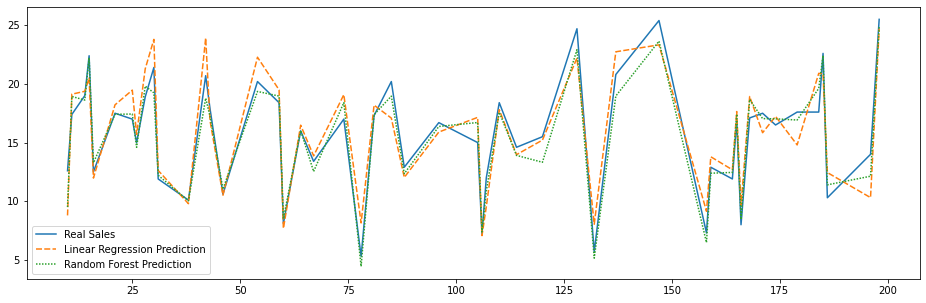

In [33]:
df_pred = pd.DataFrame()
df_pred['Real Sales'] = y_test
df_pred['Linear Regression Prediction'] = y_pred_lr
df_pred['Random Forest Prediction'] = y_pred_rf

plt.figure(figsize=(16,5))
sns.lineplot(data=df_pred)
plt.show()

### 6. New prediction

In [42]:
df_new_data = pd.read_csv('novos.csv')
df_new_data
new = {'Newspaper': 0, 'Radio': 0, 'TV': 170}
df_new_data = df_new_data.append(new, ignore_index=True)
df_new_data

,TV,Radio,Newspaper
0,23.1,3.8,69.2
1,44.5,0.0,5.1
2,170.2,45.9,0.0
3,170.0,0.0,0.0


In [43]:
prediction = model_rf.predict(df_new_data)
prediction

array([ 7.7  ,  8.725, 19.977, 15.538])

Hence it's best to invest way more in ads on TV, more in radio and a few in newspaper. 